## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("D:\datasets\cancer.csv")
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
print("Size of the data : ", dataset.shape)

Size of the data :  (309, 16)


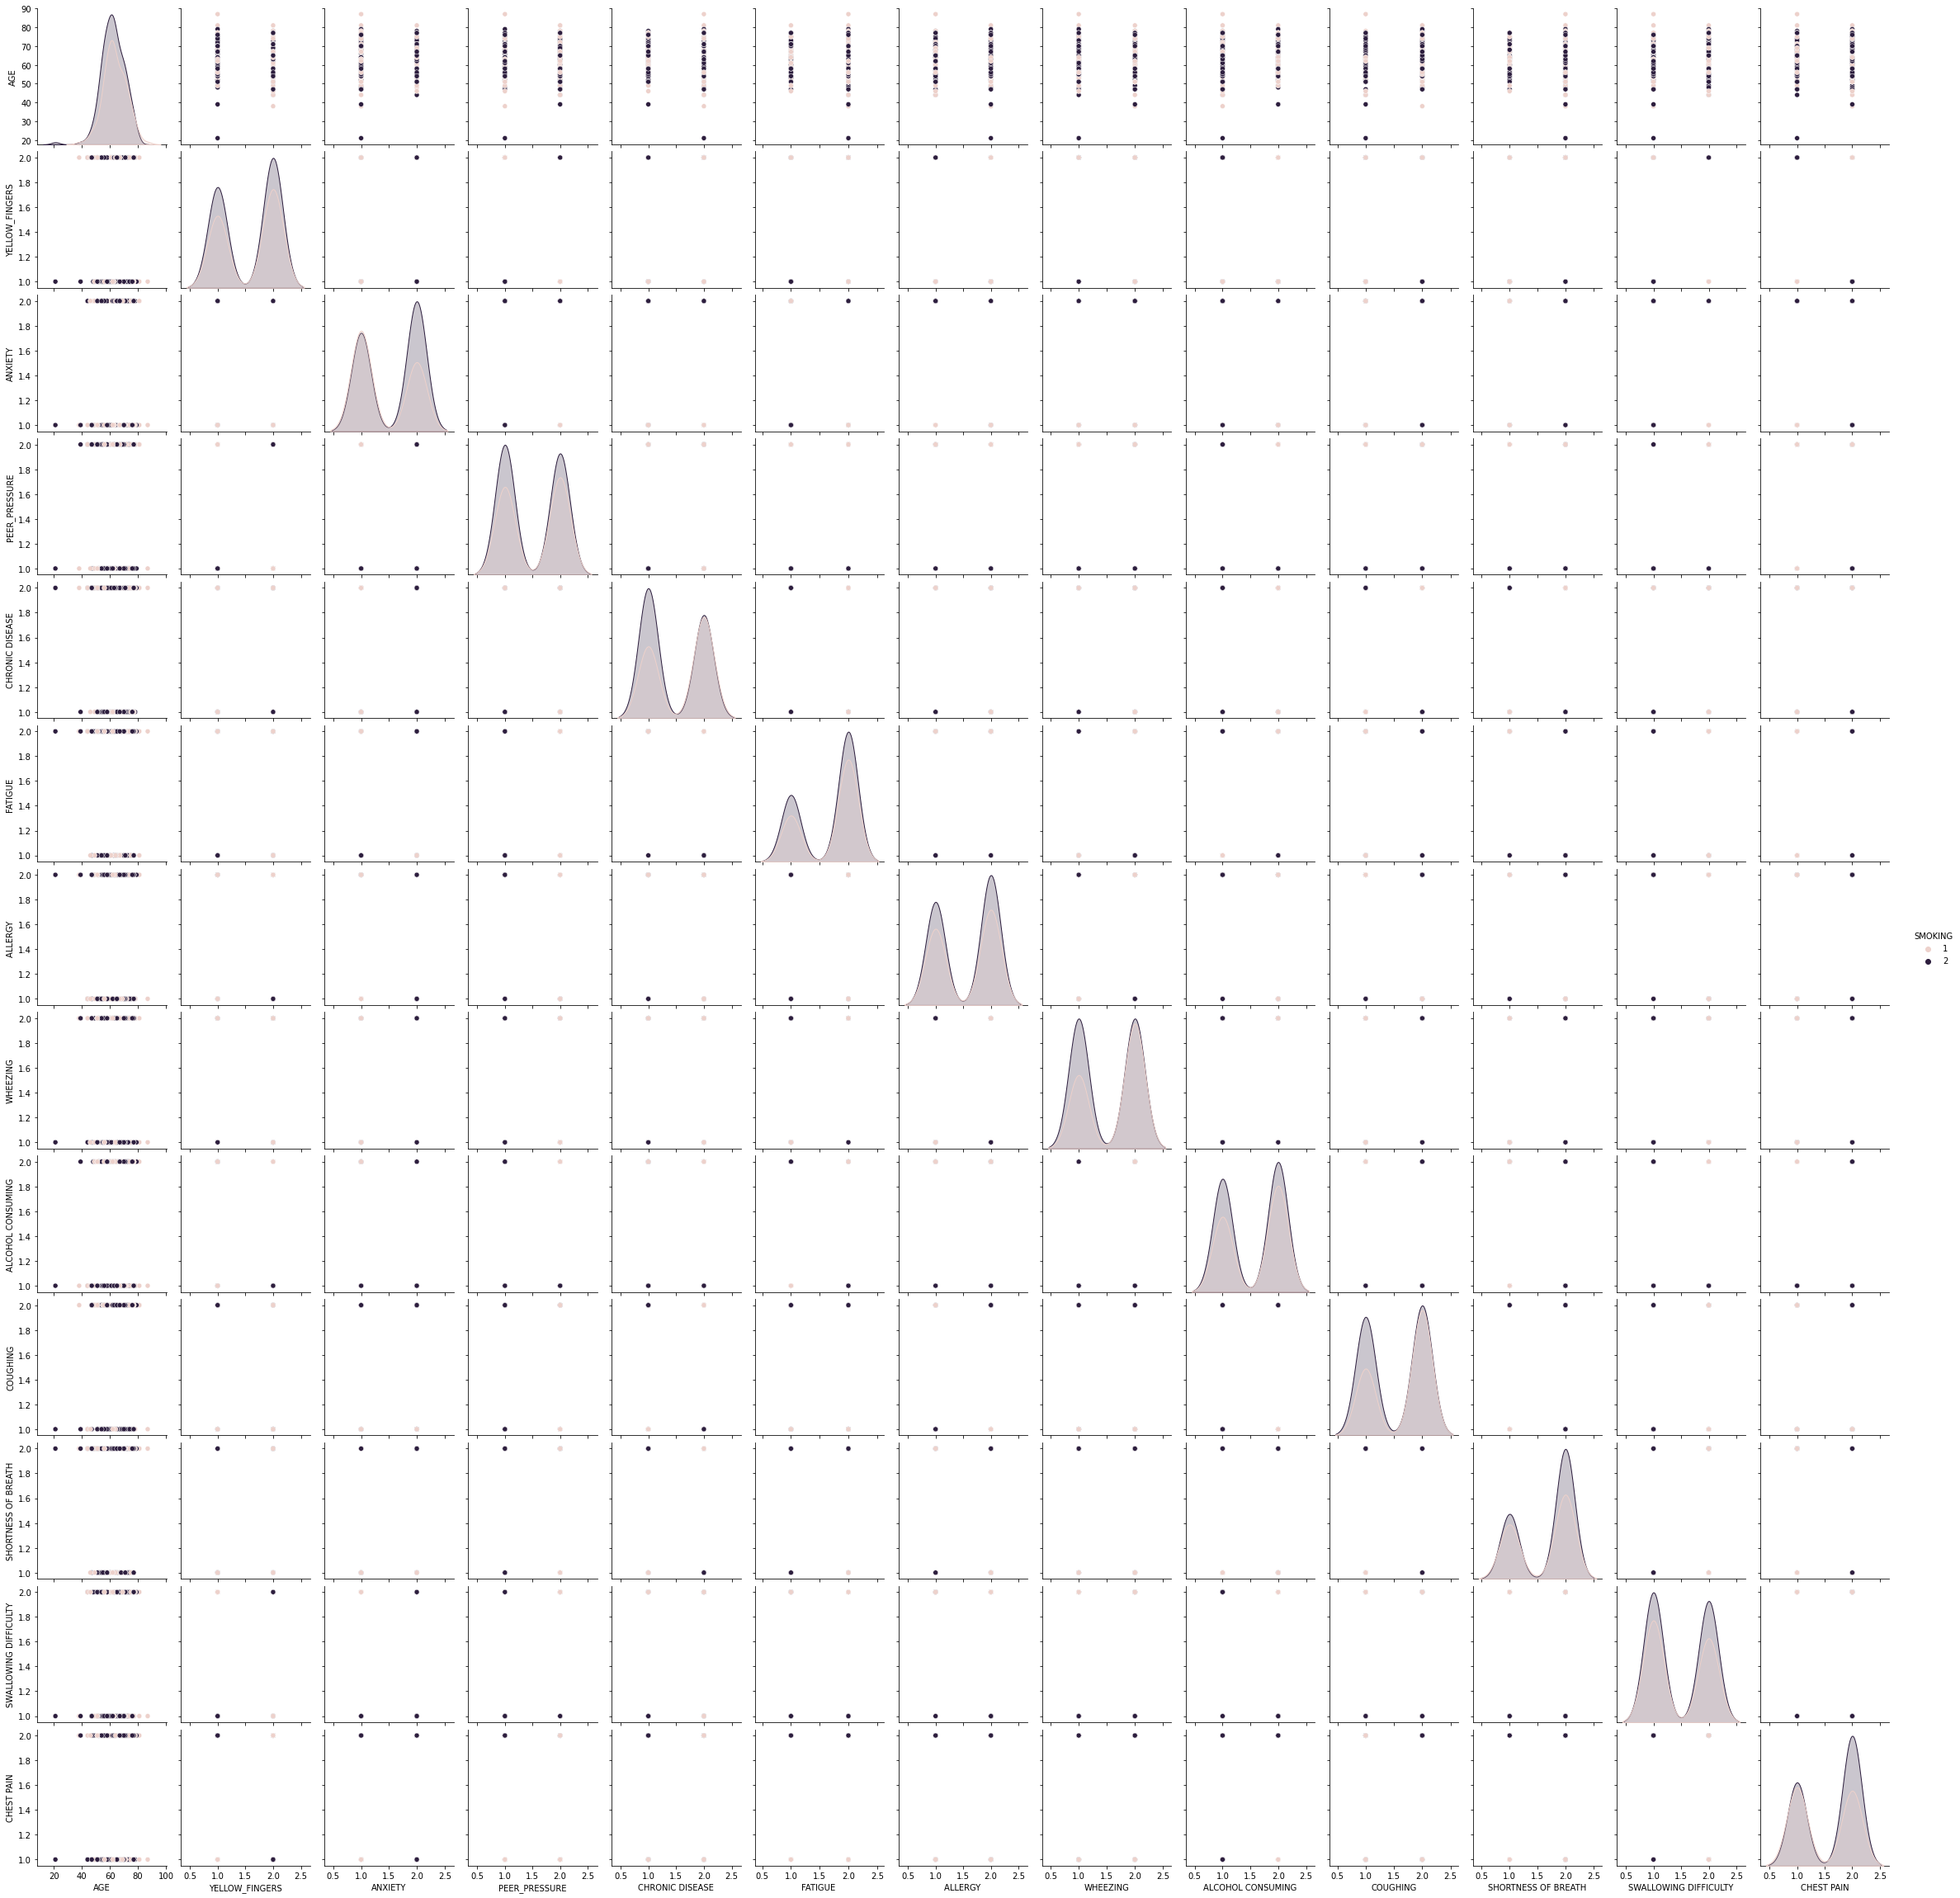

In [7]:
sns.pairplot(dataset,hue='SMOKING')
plt.show()

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['GENDER']= label_encoder.fit_transform(dataset['GENDER']) 
dataset['LUNG_CANCER']= label_encoder.fit_transform(dataset['LUNG_CANCER'])
dataset['GENDER'].unique()
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [47]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values



In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [22]:
print(y_test)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1]


In [53]:
y_pred = mlr.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in y_pred]
print(y_pred1)
print(y_pred)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0.84 1.19 0.87 0.62 0.67 0.98 1.06 1.06 1.09 0.9  0.92 0.63 0.79 1.04
 0.61 0.99 0.96 0.44 0.61 0.47 0.61 1.12 1.08 1.25 0.44 0.42 0.96 0.87
 0.81 0.89 0.95 0.92 0.96 1.   0.81 0.92 1.07 0.96 0.9  0.83 1.09 1.11
 0.95 0.92 0.96 0.47 0.64 0.93 1.08 0.45 1.08 0.59 0.98 0.9  1.2  0.99
 0.99 0.48 0.97 0.7  0.86 0.93]


In [37]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X,y)

LinearRegression()

In [64]:
y_pred = mlr.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in y_pred]
print(y_pred1)
print(y_pred)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0.84 1.19 0.87 0.62 0.67 0.98 1.06 1.06 1.09 0.9  0.92 0.63 0.79 1.04
 0.61 0.99 0.96 0.44 0.61 0.47 0.61 1.12 1.08 1.25 0.44 0.42 0.96 0.87
 0.81 0.89 0.95 0.92 0.96 1.   0.81 0.92 1.07 0.96 0.9  0.83 1.09 1.11
 0.95 0.92 0.96 0.47 0.64 0.93 1.08 0.45 1.08 0.59 0.98 0.9  1.2  0.99
 0.99 0.48 0.97 0.7  0.86 0.93]


In [39]:
c=mlr.intercept_
print(c)

-1.2123157998478553


In [40]:
print(mlr.coef_)

[0.   0.   0.07 0.12 0.08 0.09 0.09 0.15 0.15 0.06 0.19 0.11 0.04 0.1
 0.03]


In [41]:
m=[]
for i in mlr.coef_:
  m=m+[i]
print(m)

[0.0010787857395510463, 0.0014258358173795335, 0.073211437592471, 0.11975483481261673, 0.07688335464171717, 0.08823293795700222, 0.09143248402593329, 0.15031482523701362, 0.14884070706966526, 0.06000699435740719, 0.19418246409612214, 0.10580073616078754, 0.04454604524273129, 0.0996612369596813, 0.027631188504959266]


## Checking with new Input

In [29]:
X[0]

array([ 1, 69,  1,  2,  2,  1,  1,  2,  1,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [42]:
CANCER=mlr.predict([[1, 45,  1,  1,  2,  1,  2,  2,  1,  2,  1,  2,  2,  1,  1]])
CANCER

array([0.66])

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 6  4]
 [ 1 51]]


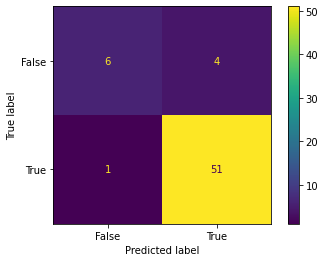

In [67]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False,True])
cm_display.plot()
plt.show()

In [43]:
r_squared = r2_score(y_test, y_pred)
print("R-squared : ", r_squared)

R-squared :  0.5020768439599969


In [50]:
# Method 1
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-squared : ", adjusted_r_squared)

Adjusted R-squared :  0.476585897405048


In [49]:
# Method 2
n=len(dataset) #Length of Total dataset
p=len(dataset.columns)-1 #length of Features
adjr= 1-(1-r_squared)*(n-1)/(n-p-1)
print("Adjusted R-squared : ", adjr)

Adjusted R-squared :  0.476585897405048


In [51]:
import statsmodels.api as sm
m = sm.OLS(y,X).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              208.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                   7.19e-147
Time:                        19:18:18   Log-Likelihood:                         -38.194
No. Observations:                 309   AIC:                                      106.4
Df Residuals:                     294   BIC:                                      162.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.039     -0.429      0.668      -0.094       0.060
x2            -0.0052      0.002     -3.105      0.002      -0.008      -0.002
x3             0.0091      0.033      0.278      0.781      -0.055       0.073
x4             0.0685      0.042      1.616      0.107      -0.015       0.152
x5             0.0473      0.045      1.048      0.296      -0.042       0.136
x6             0.0429      0.038      1.136      0.257      -0.031       0.117
x7             0.0302      0.033      0.915      0.361      -0.035       0.095
x8             0.0961      0.040      2.398      0.017       0.017       0.175
x9             0.1287      0.035      3.634      0.000       0.059       0.198
x10            0.0327      0.037      0.885      0.377      -0.040       0.105
x11            0.1346      0.041      3.264      0.001       0.053       0.216
x12            0.0997      0.040      2.471      0.014       0.020       0.179
x13           -0.0140      0.040     -0.346      0.730      -0.094       0.066
x14            0.0953      0.041      2.345      0.020       0.015       0.175
x15            0.0091      0.036      0.251      0.802      -0.063       0.081
==============================================================================
Omnibus:                       87.270   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.881
Skew:                          -1.527   Prob(JB):                     9.54e-37
Kurtosis:                       4.885   Cond. No.                         238.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [69]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [70]:
CANCER=model.predict([[1, 45,  1,  1,  2,  1,  2,  2,  1,  2,  1,  2,  2,  1,  1]])
CANCER

array([1])

In [71]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [72]:
a=np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1)
a

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [73]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 5  5]
 [ 1 51]]


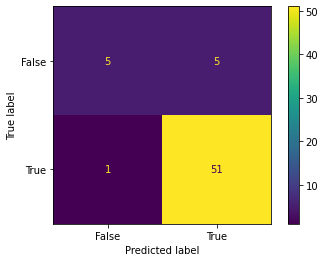

In [74]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False,True])
cm_display.plot()
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test, y_pred)*100
print("Accuracy: {0}%".format(Accuracy))

Accuracy: 90.32258064516128%


In [76]:
Precision = metrics.precision_score(y_test, y_pred)
print("Precision=",Precision)

Precision= 0.9107142857142857


In [77]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("Sensitivity=",Sensitivity_recall)

Sensitivity= 0.9807692307692307


In [78]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print("Specificity=",Specificity)

Specificity= 0.5


In [79]:
F1_score = metrics.f1_score(y_test, y_pred)
print("F1-Score=",F1_score)

F1-Score= 0.9444444444444444


In [80]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}) 

{'Accuracy': 90.32258064516128, 'Precision': 0.9107142857142857, 'Sensitivity_recall': 0.9807692307692307, 'Specificity': 0.5, 'F1_score': 0.9444444444444444}


### *Receiver Operating Curve - ROC Curve and Area Under Curve - AUC*

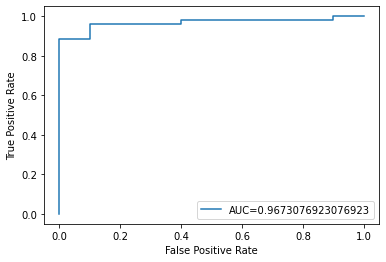

In [81]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()